# Maximum Likelihood Estimation

Suppose we wish to estimate the parameter $\theta$, given conditionally independent observations
$$
p(x| \theta) = \prod_{i=1}^N p(x_i| \theta)
$$
The maximum-likelihood estimator $\theta^*$ maximizes the log likelihood function
\begin{align}
\theta^* = \arg\max_\theta \mathcal{L}(\theta) 
\end{align}

The likelihood function can be written as the sum 
$$
\mathcal{L}(\theta) = \sum_{i=1}^N \mathcal{L}_i(\theta) 
$$

$\mathcal{L}_i(\theta) \equiv \log p(x_i| \theta)$

## Example: Estimating the variance parameter of a Gaussian

Assume for $i=1\dots N$, we have conditionally independent observations 
$$
x_i \sim \mathcal{N}(x; 0, \theta)
$$

The likelihood contribution of a single data point is 
$$\log p(x_i|\theta) = \mathcal{L}_i =  - \frac{1}{2} \frac{x_i^2}{\theta} -\frac{1}{2}\log 2\pi \theta$$

The total log-likelihood is the sum of individual data terms 
$$\log p(x|\theta) = \mathcal{L}(\theta) = \sum_{i=1}^N \mathcal{L}_i =  - \frac{1}{2} \frac{\sum_{i=1}^N x_i^2}{\theta} -\frac{N}{2}\log 2\pi \theta$$

$$\frac{\partial \mathcal{L}(\theta)}{\partial \theta} = g(\theta) = -\frac{N}{2 \theta} + \frac{1}{2} \frac{\sum_i x_i^2}{\theta^2}$$

This problem has a solution in closed form:

\begin{align}                                                                                                                                                                                                                                                                                                                                                    g(\theta) & = 0 = -\frac{N}{2 \theta} + \frac{1}{2} \frac{\sum_i x_i^2}{\theta^2} \\
                                                                                                                                                                                                                                                                                                                                                    \theta^* & = \frac{\sum_i x_i^2}{N}
                                                                                                                                                                                                                                                                                                                                                    \end{align}

## Recursive estimation

Let's denote the estimate at $N$'th step as
\begin{align}
\theta^*_{N} & = \frac{\sum_{i=1}^N x_i^2}{N} \\
N \theta^*_{N} & = \sum_{i=1}^{N-1} x_i^2 + x_{N}^2 \\
\theta^*_{N} & = \frac{1}{N}\sum_{i=1}^{N-1} x_i^2 + \frac{1}{N} x_{N}^2 \\
 & = \frac{N-1}{N} \theta^*_{N-1} + \frac{1}{N} x_{N}^2 \\
& = \theta^*_{N-1} + \frac{1}{N} (x_{N}^2 - \theta^*_{N-1})
\end{align}

Generate sample data from the true model

In [89]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import pandas as pd

mpl.rc('font',**{'size': 20, 'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rc('text', usetex=True)

N = 1000
x = np.random.randn(N)

def g(th, N, s):
    return -0.5/th + 0.5*s/N/th**2


Exact recursive maximum likelihood

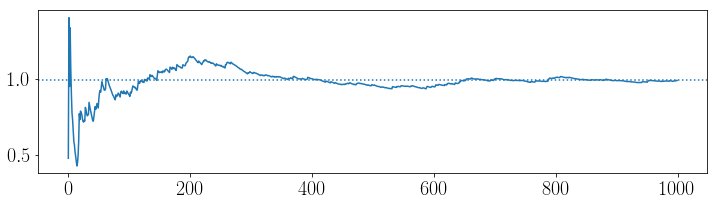

In [55]:
th_star = np.mean(x**2)
th = 0
TH = []
for n in range(N):
    th = th + (x[n]**2 - th)/(n+1)
    TH.append(th)

plt.figure(figsize=(12,3))
plt.plot(TH)
plt.axhline(th_star, ls=':')
plt.show()

The following panel illustrates the true gradient of the likelihood $\mathcal{L}$ with 
estimates obtained on random subsets deoted by $\Omega$. The expectation of the random gradients
is the true gradient

$$
g(\theta) = \left\langle{g_\Omega(\theta)}\right\rangle
$$


In [90]:

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import clear_output, display, HTML
from matplotlib import rc



def plot_batch(B=1, NumOfBatches=10):
    th = np.linspace(0.4,2)

    for J in range(NumOfBatches):
        s = np.sum(np.random.choice(x, size=B,replace=False)**2)
        plt.plot(th, g(th, B, s), ls='-', alpha=0.3, color='blue')

    s = np.sum(x**2)
    plt.plot(th, g(th, N, s), ls=':', linewidth=4, color='red',label='true')

    plt.gca().set_ylim([-0.2,1])
    plt.grid()

    plt.xlabel('$\\theta$/Parameter')
    plt.ylabel('$g$/Gradient Estimate')
    #plt.legend(['$g_\Omega$','$g(\\theta)$'])
    plt.title('True gradient versus mini-batch')
    plt.show()
    
res = interact(plot_batch, NumOfBatches=(10,400,10), B=(1,500,10))

interactive(children=(IntSlider(value=1, description='B', max=500, min=1, step=10), IntSlider(value=10, description='NumOfBatches', max=400, min=10, step=10), Output()), _dom_classes=('widget-interact',))

# SGD

* Local search algorithms have the form :
\begin{align}
w_0 & = \text{some initial value} \\
\text{for}\;\; & \tau = 1, 2,\dots \\
& w_\tau = w_{\tau-1} + \eta_\tau s_\tau
\end{align}

$\eta_\tau$ is a learning rate and $s_\tau$ is a search direction. 

At each iteration $\tau$, minibatch SGD selects random $i$ from $1\dots N$. Set the search direction 
$$
s_\tau = \nabla\mathcal{L}_i(\theta_{\tau-1})
$$



# Minibatch SGD






At each iteration $\tau$, minibatch SGD selects a random subset $\Omega_\tau$ of size $B_\tau$ of $1\dots N$. Set the search direction 
$$
s_\tau = \frac{1}{B_\tau}\sum_{i\in \Omega_\tau} \nabla\mathcal{L}_i(\theta_{\tau-1})
$$

When the batch size is one ($B=1$), the minibatch SGD algorithm is SGD.

\begin{align}
g_\Omega(\theta)/B & = -\frac{1}{2 \theta} + \frac{1}{2} \frac{\sum_{i\in \Omega} x_i^2}{B\theta^2} \\
& = \frac{1}{2\theta^2}\left(-\theta + \frac{1}{B}\sum_{i\in \Omega} x_i^2\right)
\end{align}


In [62]:

th_true = np.sum(x**2)/N

def plot_path(B=1, eta=1., seed=0):
    np.random.seed(seed)
    theta = 1.5

    MAX_ITER = 1000
    
    TH = []
    TH.append(theta)
    for tau in range(MAX_ITER):
        eta_tau = eta/(tau+1)
        x_omega = np.random.choice(x, size=B)
        theta = theta + eta_tau*(-0.5/theta + 0.5*np.sum(x_omega**2)/B/theta**2 )
        TH.append(theta)

    TH = np.array(TH)
    plt.figure(figsize=(12,3))
    plt.plot(TH)
    plt.axhline(th_true)
    plt.ylabel('$\\theta_\\tau$/Estimate at $\\tau$')
    plt.xlabel('$\\tau$/Iteration')
    
    plt.ylim([0.75, 1.5])

    plt.show()
    
res = interact(plot_path, B=(1,100), eta=(0.01,5,0.01), seed=(0,100))

interactive(children=(IntSlider(value=1, description='B', min=1), FloatSlider(value=1.0, description='eta', max=5.0, min=0.01, step=0.01), IntSlider(value=0, description='seed'), Output()), _dom_classes=('widget-interact',))

A model for outliers

$$
x_i \sim \frac{1}{2}\mathcal{N}(x; 0, \theta) + \frac{1}{2}\mathcal{N}(x; 0, 100)
$$


In [64]:
from IPython.display import display, Math, Latex, HTML
import notes_utilities as nut
from importlib import reload
#reload(nut)
display(Latex(r'$\DeclareMathOperator{\trace}{Tr}$'))

L = nut.pdf2latex_gauss(x=r's', m=r'\mu',v=r'v')
#L = nut.pdf2latex_mvnormal(x=r's', m=r'\mu',v=r'\Sigma')
#L = nut.pdf2latex_mvnormal(x=r'x_t', m=r'(Ax_{t-1})',v=r'Q')
#L = nut.pdf2latex_mvnormal(x=r'y_t', m=r'(Cx_{t})',v=r'R')
#L = nut.pdf2latex_mvnormal(x=r's', m=0,v=r'I')
#L = nut.pdf2latex_gamma(x=r'x', a=r'a',b=r'b')
#L = nut.pdf2latex_invgamma(x=r'x', a=r'a',b=r'b')
#L = nut.pdf2latex_beta(x=r'\pi', a=r'\alpha',b=r'\beta')

eq = L[0]+'='+L[1]+'='+L[2]
display(Math(eq))
display(Latex(eq))
display(HTML(nut.eqs2html_table(L)))

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

"\begin{eqnarray}\mathcal{N}(s; \mu, v)\end{eqnarray}","\mathcal{N}(s; \mu, v)"
\begin{eqnarray}\frac{1}{\sqrt{2\pi v} } \exp\left(-\frac12 \frac{(s - \mu )^2}{v}\right)\end{eqnarray},\frac{1}{\sqrt{2\pi v} } \exp\left(-\frac12 \frac{(s - \mu )^2}{v}\right)
\begin{eqnarray}\exp\left(-\frac{1}{2}\frac{s^2}{v} + \frac{s \mu }{v} -\frac{1}{2}\frac{\mu^2}{v} -\frac{1}{2}\log(2{\pi}v) \right)\end{eqnarray},\exp\left(-\frac{1}{2}\frac{s^2}{v} + \frac{s \mu }{v} -\frac{1}{2}\frac{\mu^2}{v} -\frac{1}{2}\log(2{\pi}v) \right)
\begin{eqnarray}-\frac{1}{2}\frac{s^2}{v} + \frac{s \mu }{v} -\frac{1}{2}\frac{\mu^2}{v} -\frac{1}{2}\log v -\frac{1}{2}\log 2\pi\end{eqnarray},-\frac{1}{2}\frac{s^2}{v} + \frac{s \mu }{v} -\frac{1}{2}\frac{\mu^2}{v} -\frac{1}{2}\log v -\frac{1}{2}\log 2\pi


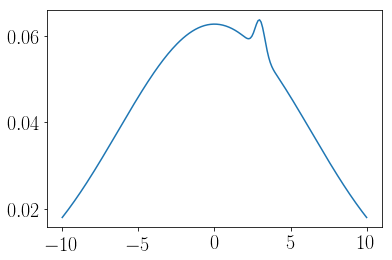

In [87]:
def log_gauss_pdf(x,mu,v):
    return -0.5*np.log(2*np.pi*v) - 0.5*(x-mu)**2/v

x = np.linspace(-10,10,200)
v = 0.1
v0 = 40.
m = 3.

y = np.log(0.006*np.exp(log_gauss_pdf(x,m,v)) + 0.994*np.exp(log_gauss_pdf(x,0,v0)))

plt.plot(x,np.exp(y))
plt.show()
